<a href="https://colab.research.google.com/github/DeshikReddy01/Task2/blob/main/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:
from sklearn.svm import SVC

# Linear SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# RBF SVM
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)


SVC(random_state=42)

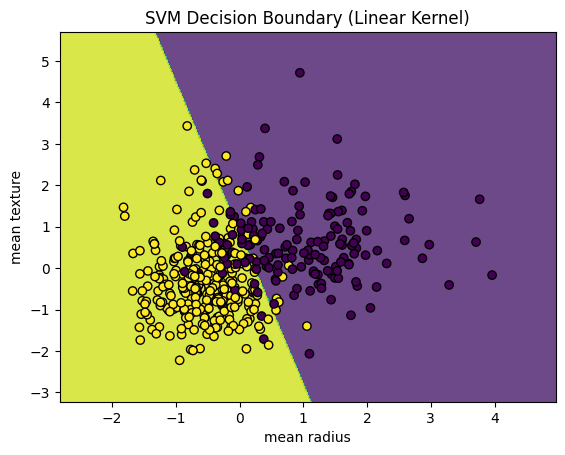

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Pick two features for 2D plot
X_vis = X[['mean radius', 'mean texture']]
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y, test_size=0.2, random_state=42)
scaler_vis = StandardScaler()
X_vis_train_scaled = scaler_vis.fit_transform(X_vis_train)
X_vis_test_scaled = scaler_vis.transform(X_vis_test)

model_vis = SVC(kernel='linear')
model_vis.fit(X_vis_train_scaled, y_vis_train)

# Plotting
h = 0.02
x_min, x_max = X_vis_train_scaled[:, 0].min() - 1, X_vis_train_scaled[:, 0].max() + 1
y_min, y_max = X_vis_train_scaled[:, 1].min() - 1, X_vis_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_vis_train_scaled[:, 0], X_vis_train_scaled[:, 1], c=y_vis_train, edgecolors='k')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for RBF kernel
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Best model from Grid Search
best_model = grid.best_estimator_

# Cross-validation scores
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Test performance
y_pred = best_model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))


Cross-validation Accuracy Scores: [0.62280702 0.62280702 0.63157895 0.64035088 0.61946903]
Mean CV Accuracy: 0.6274025772395591
Confusion Matrix:
 [[41  2]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy on Test Set: 0.9824561403508771
